In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from pathlib import Path
from functools import reduce

from datetime import datetime
from hts import HTSRegressor
from hts.utilities.load_data import load_hierarchical_sine_data
import hts.functions
import collections
from hts.hierarchy import HierarchyTree

## Hierarchical ARIMA by ags2 and ags5 

In [28]:
df = pd.read_csv('./../final_dfs/for_modeling/df_final_date_wide.csv', converters={'ags2': str, 'ags5': str}) 
df = df[['ags2','ags5','unemployment_rate', 'date']]

In [29]:
d = df.groupby('ags2')['ags5'].apply(lambda x: list(set(x))).to_dict()
d

{'01': ['01058',
  '01057',
  '01001',
  '01055',
  '01002',
  '01060',
  '01059',
  '01051',
  '01053',
  '01062',
  '01004',
  '01061',
  '01054',
  '01056',
  '01003'],
 '02': ['02000'],
 '03': ['03256',
  '03452',
  '03155',
  '03254',
  '03255',
  '03458',
  '03357',
  '03356',
  '03459',
  '03251',
  '03404',
  '03354',
  '03401',
  '03454',
  '03460',
  '03102',
  '03457',
  '03455',
  '03451',
  '03359',
  '03358',
  '03461',
  '03252',
  '03352',
  '03351',
  '03151',
  '03241',
  '03103',
  '03361',
  '03405',
  '03154',
  '03462',
  '03101',
  '03453',
  '03158',
  '03353',
  '03360',
  '03157',
  '03355',
  '03403',
  '03257',
  '03456',
  '03402',
  '03159',
  '03153'],
 '04': ['04012', '04011'],
 '05': ['05120',
  '05113',
  '05316',
  '05774',
  '05112',
  '05117',
  '05766',
  '05562',
  '05314',
  '05570',
  '05370',
  '05114',
  '05554',
  '05382',
  '05358',
  '05515',
  '05124',
  '05978',
  '05974',
  '05754',
  '05366',
  '05119',
  '05513',
  '05913',
  '05378',


In [32]:
level_names = ['ags2', 'ags5']
hierarchy = [['ags2'], ['ags5']]
df_wide, sum_mat, sum_mat_labels = hts.functions.get_hierarchichal_df(df,
                                                                    level_names=level_names,
                                                                    hierarchy=hierarchy,
                                                                    date_colname='date',
                                                                    val_colname='unemployment_rate')
df_wide

ags2_ags5,01_01001,01_01002,01_01003,01_01004,01_01051,01_01053,01_01054,01_01055,01_01056,01_01057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,8.2,7.9,7.8,8.3,6.4,4.9,6.3,6.3,4.8,4.7,...,6.2,3.9,5.5,4.5,4.2,5.9,4.8,5.5,5.3,8.0
2019-02-01,7.8,7.7,7.6,8.2,6.3,5.0,6.3,6.2,4.8,4.5,...,6.1,3.7,5.5,4.4,4.0,5.9,4.7,5.4,5.2,8.0
2019-03-01,7.8,7.8,7.5,8.0,6.0,4.8,5.5,5.6,4.6,4.3,...,5.7,3.4,5.3,4.2,3.7,5.7,4.4,5.2,4.9,7.6
2019-04-01,7.6,7.6,7.4,7.9,5.5,4.6,4.5,4.8,4.5,4.0,...,5.3,3.2,4.9,4.0,3.7,5.3,4.2,4.8,4.6,7.2
2019-05-01,7.7,7.7,7.3,8.0,5.2,4.6,4.2,4.5,4.5,3.9,...,5.4,3.2,4.7,3.9,3.7,5.3,4.1,4.6,4.5,7.1
2019-06-01,7.7,7.6,7.1,7.9,5.0,4.5,4.1,4.4,4.5,3.8,...,5.2,3.2,4.7,3.8,3.6,5.1,3.9,4.5,4.4,7.0
2019-07-01,8.1,7.8,7.4,8.0,5.2,4.8,4.3,4.6,4.7,4.0,...,5.2,3.3,4.8,3.9,3.7,5.2,3.9,4.5,4.5,7.0
2019-08-01,8.3,7.8,7.3,7.9,5.3,4.7,4.1,4.5,4.5,3.9,...,5.5,3.4,4.9,4.0,3.8,5.2,4.1,4.5,4.5,7.0
2019-09-01,8.3,7.4,7.1,7.6,5.1,4.6,4.0,4.3,4.3,3.8,...,5.3,3.2,4.7,3.8,3.8,4.9,3.9,4.1,4.4,6.5


{'01': ['01058',
  '01057',
  '01001',
  '01055',
  '01002',
  '01060',
  '01059',
  '01051',
  '01053',
  '01062',
  '01004',
  '01061',
  '01054',
  '01056',
  '01003'],
 '02': ['02000'],
 '03': ['03256',
  '03452',
  '03155',
  '03254',
  '03255',
  '03458',
  '03357',
  '03356',
  '03459',
  '03251',
  '03404',
  '03354',
  '03401',
  '03454',
  '03460',
  '03102',
  '03457',
  '03455',
  '03451',
  '03359',
  '03358',
  '03461',
  '03252',
  '03352',
  '03351',
  '03151',
  '03241',
  '03103',
  '03361',
  '03405',
  '03154',
  '03462',
  '03101',
  '03453',
  '03158',
  '03353',
  '03360',
  '03157',
  '03355',
  '03403',
  '03257',
  '03456',
  '03402',
  '03159',
  '03153'],
 '04': ['04012', '04011'],
 '05': ['05120',
  '05113',
  '05316',
  '05774',
  '05112',
  '05117',
  '05766',
  '05562',
  '05314',
  '05570',
  '05370',
  '05114',
  '05554',
  '05382',
  '05358',
  '05515',
  '05124',
  '05978',
  '05974',
  '05754',
  '05366',
  '05119',
  '05513',
  '05913',
  '05378',


In [33]:
df_wide['total'] = df_wide.sum(axis=1)
for key in d.keys():
    df_wide[key] = df_wide[[col for col in df_wide.columns if col.startswith(key)]].sum(axis=1)

In [34]:
df_wide.index = pd.to_datetime(df_wide.index)

In [35]:
d['total'] = list(d.keys())

In [10]:
ht = HierarchyTree.from_nodes(d, df_wide)
print(ht)

- total
   |- 01
   |  |- 01058
   |  |- 01057
   |  |- 01001
   |  |- 01055
   |  |- 01002
   |  |- 01060
   |  |- 01059
   |  |- 01051
   |  |- 01053
   |  |- 01062
   |  |- 01004
   |  |- 01061
   |  |- 01054
   |  |- 01056
   |  - 01003
   |- 02
   |  - 02000
   |- 03
   |  |- 03256
   |  |- 03452
   |  |- 03155
   |  |- 03254
   |  |- 03255
   |  |- 03458
   |  |- 03357
   |  |- 03356
   |  |- 03459
   |  |- 03251
   |  |- 03404
   |  |- 03354
   |  |- 03401
   |  |- 03454
   |  |- 03460
   |  |- 03102
   |  |- 03457
   |  |- 03455
   |  |- 03451
   |  |- 03359
   |  |- 03358
   |  |- 03461
   |  |- 03252
   |  |- 03352
   |  |- 03351
   |  |- 03151
   |  |- 03241
   |  |- 03103
   |  |- 03361
   |  |- 03405
   |  |- 03154
   |  |- 03462
   |  |- 03101
   |  |- 03453
   |  |- 03158
   |  |- 03353
   |  |- 03360
   |  |- 03157
   |  |- 03355
   |  |- 03403
   |  |- 03257
   |  |- 03456
   |  |- 03402
   |  |- 03159
   |  - 03153
   |- 04
   |  |- 04012
   |  - 04011
   |- 05
   |  

In [12]:
hp = HTSRegressor(model='auto_arima', revision_method='OLS', n_jobs=0)
hp.fit(df_wide, d)

Fitting models: 100%|██████████| 418/418 [03:04<00:00,  2.26it/s]


In [13]:
predicted_autoarima = hp.predict(steps_ahead=8)

Fitting models:   0%|          | 0/418 [00:00<?, ?it/s]/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1

/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
Fitting models:  12%|█▏        | 51/418 [00:00<00:01, 251.37it/s]/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of

/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In fut

/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In fut

/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
Fitting models:  38%|███▊      | 159/418 [00:00<00:01, 252.60it/s]/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As o

Fitting models:  45%|████▍     | 188/418 [00:00<00:00, 261.81it/s]/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As o

/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In fut

/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In fut

/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In fut

/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
Fitting models:  77%|███████▋  | 322/418 [00:01<00:00, 257.00it/s]/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As o

/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In fut

/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In fut

In [27]:
predicted_autoarima

,total,01,02,03,04,05,06,07,08,09,...,16073,16055,16071,16072,16067,16061,16052,16063,16056,16054
2019-01-01,35.651222,0.275476,1.143006,-19.817314,-0.829980,2.437343,-0.784407,9.724750,-34.928325,-34.328181,...,-3.898473,2.841916,-3.898473,-3.898473,-1.840074,-1.840074,11.267427,-1.840074,2.841916,2.841916
2019-02-01,7886.019661,285.618274,70.505602,923.390095,106.192120,1063.444411,391.691624,568.896579,734.652157,1231.911638,...,13.560376,16.520394,12.160376,11.860376,-0.980581,-1.880581,18.766681,-2.180581,17.120394,15.720394
2019-03-01,7779.108738,279.961368,69.376851,910.569803,105.327378,1049.654098,388.894234,560.934146,721.940298,1212.476691,...,13.465678,15.946046,11.965678,11.508039,-0.913921,-1.913921,18.487755,-2.213921,16.746046,15.346046
2019-04-01,7475.596113,270.127997,66.861283,875.293154,103.203398,1031.444421,374.702887,542.291332,702.871934,1134.010033,...,13.072172,15.488608,11.677585,11.127277,-0.933901,-1.904407,17.983087,-2.004407,16.188608,14.888608
2019-05-01,7151.817290,256.569076,63.896542,842.591228,100.467579,1024.166397,366.413436,526.393491,682.491953,1046.502584,...,12.365054,14.706861,11.228718,11.006370,-0.756232,-2.077478,17.235464,-2.077478,15.406861,14.206861
2019-06-01,7083.181308,254.136773,63.982480,837.334598,100.855944,1029.993172,365.588118,524.974859,677.172609,1020.673884,...,12.508544,14.732316,11.016155,10.765842,-0.987199,-2.095022,17.237324,-1.995022,15.232316,13.732316
2019-07-01,7002.055992,249.699581,62.903133,827.946879,99.828472,1022.444198,356.982809,523.643218,672.713687,1004.964271,...,12.027849,14.420040,10.893742,10.688954,-0.916846,-2.210712,16.801944,-2.010712,15.220040,13.520040
2019-08-01,7191.901968,259.473891,64.984232,859.653546,101.434785,1058.825723,381.523692,553.712931,687.176448,1028.625822,...,12.685218,14.685022,11.234113,11.103181,-0.750031,-2.114718,17.264071,-2.114718,15.585022,13.885022
2019-09-01,7356.273109,257.766327,65.832984,866.997020,103.353498,1063.635506,363.800232,531.309222,726.881272,1105.081230,...,12.424105,14.785502,11.310023,11.097488,-1.149436,-2.216276,17.261011,-2.016276,15.585502,13.685502
2019-10-01,7061.525296,248.889848,63.316610,824.898443,99.873884,1000.462765,356.966668,520.469848,699.604713,1057.192492,...,11.902199,14.168766,10.923946,10.922087,-0.970983,-2.316515,16.717996,-1.916515,14.968766,13.368766


In [25]:
states = df["ags2"].unique().tolist()
states

['01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16']

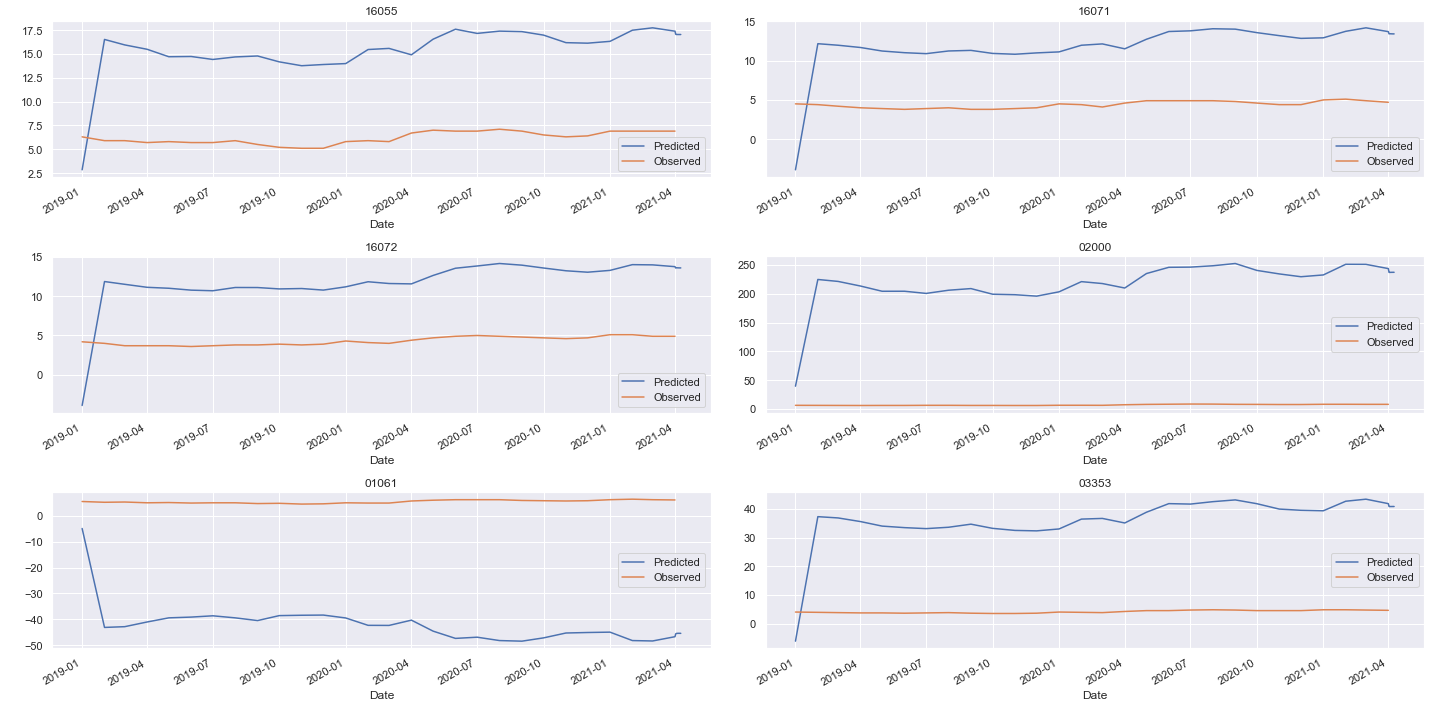

In [37]:
fig, axes = plt.subplots(3, 2, figsize=(20, 10))

def plot_results(cols, axes, preds):
    axes = np.hstack(axes)
    for ax, col in zip(axes, cols):
        preds[col].plot(ax=ax, label="Predicted")
        df_wide[col].plot(ax=ax, label="Observed")

        ax.legend()
        ax.set_title(col)
        ax.set_xlabel("Date")
        ax.set_ylabel(" ")
    
plot_results(['16055','16071','16072','02000','01061','03353'], axes, predicted_autoarima)
plt.tight_layout()

In [38]:
hp = HTSRegressor(model='auto_arima', revision_method='OLS', n_jobs=0)
hp.fit(df_wide, d)

Fitting models: 100%|██████████| 418/418 [03:22<00:00,  2.06it/s]


In [39]:
predicted_autoarima = hp.predict(steps_ahead=8)

Fitting models:   0%|          | 0/418 [00:00<?, ?it/s]/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1

/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In fut

/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In fut

/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In fut

/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In fut

/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In fut

/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In fut

/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
Fitting models:  60%|█████▉    | 250/418 [00:01<00:00, 238.98it/s]/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As o

Fitting models:  67%|██████▋   | 279/418 [00:01<00:00, 252.09it/s]/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As o

/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In fut

/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
Fitting models:  84%|████████▍ | 353/418 [00:01<00:00, 198.38it/s]/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As o

/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "
/Users/amitsasson/venv/DSSGx/lib/python3.8/site-packages/pmdarima/arima/arima.py:577: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In fut

In [40]:
predicted_autoarima

,total,01,02,03,04,05,06,07,08,09,...,16073,16055,16071,16072,16067,16061,16052,16063,16056,16054
2019-01-01,35.651222,0.275476,1.143006,-19.817314,-0.829980,2.437343,-0.784407,9.724750,-34.928325,-34.328181,...,-3.898473,2.841916,-3.898473,-3.898473,-1.840074,-1.840074,11.267427,-1.840074,2.841916,2.841916
2019-02-01,7886.019661,285.618274,70.505602,923.390095,106.192120,1063.444411,391.691624,568.896579,734.652157,1231.911638,...,13.560376,16.520394,12.160376,11.860376,-0.980581,-1.880581,18.766681,-2.180581,17.120394,15.720394
2019-03-01,7779.108738,279.961368,69.376851,910.569803,105.327378,1049.654098,388.894234,560.934146,721.940298,1212.476691,...,13.465678,15.946046,11.965678,11.508039,-0.913921,-1.913921,18.487755,-2.213921,16.746046,15.346046
2019-04-01,7475.596113,270.127997,66.861283,875.293154,103.203398,1031.444421,374.702887,542.291332,702.871934,1134.010033,...,13.072172,15.488608,11.677585,11.127277,-0.933901,-1.904407,17.983087,-2.004407,16.188608,14.888608
2019-05-01,7151.817290,256.569076,63.896542,842.591228,100.467579,1024.166397,366.413436,526.393491,682.491953,1046.502584,...,12.365054,14.706861,11.228718,11.006370,-0.756232,-2.077478,17.235464,-2.077478,15.406861,14.206861
2019-06-01,7083.181308,254.136773,63.982480,837.334598,100.855944,1029.993172,365.588118,524.974859,677.172609,1020.673884,...,12.508544,14.732316,11.016155,10.765842,-0.987199,-2.095022,17.237324,-1.995022,15.232316,13.732316
2019-07-01,7002.055992,249.699581,62.903133,827.946879,99.828472,1022.444198,356.982809,523.643218,672.713687,1004.964271,...,12.027849,14.420040,10.893742,10.688954,-0.916846,-2.210712,16.801944,-2.010712,15.220040,13.520040
2019-08-01,7191.901968,259.473891,64.984232,859.653546,101.434785,1058.825723,381.523692,553.712931,687.176448,1028.625822,...,12.685218,14.685022,11.234113,11.103181,-0.750031,-2.114718,17.264071,-2.114718,15.585022,13.885022
2019-09-01,7356.273109,257.766327,65.832984,866.997020,103.353498,1063.635506,363.800232,531.309222,726.881272,1105.081230,...,12.424105,14.785502,11.310023,11.097488,-1.149436,-2.216276,17.261011,-2.016276,15.585502,13.685502
2019-10-01,7061.525296,248.889848,63.316610,824.898443,99.873884,1000.462765,356.966668,520.469848,699.604713,1057.192492,...,11.902199,14.168766,10.923946,10.922087,-0.970983,-2.316515,16.717996,-1.916515,14.968766,13.368766


In [72]:
resid = hp.hts_result.residuals

In [73]:
def entries_to_remove(entries, the_dict):
    for key in entries:
        if key in the_dict:
            del the_dict[key]
    return the_dict

resid = entries_to_remove(list(d.keys()), resid)
resid

{'01058': array([-4.30000000e+00,  1.00000000e-01,  2.00000000e-01,  9.99999994e-02,
        -1.00000000e-01,  2.00000000e-01, -3.00000000e-01,  1.00000000e-01,
         2.00000000e-01,  4.44089210e-16,  1.00000000e-01,  0.00000000e+00,
        -4.00000000e-01,  1.00000000e-01,  2.00000000e-01, -6.00000000e-01,
        -3.00000000e-01,  0.00000000e+00, -2.00000000e-01,  1.00000000e-01,
         1.00000000e-01,  1.00000000e-01,  1.00000000e-01,  0.00000000e+00,
        -3.00000000e-01,  0.00000000e+00,  2.00000000e-01,  1.00000000e-01]),
 '01057': array([-4.7,  0.2,  0.2,  0.3,  0.1,  0.1, -0.2,  0.1,  0.1,  0. , -0.1,
        -0.1, -0.4,  0.1,  0.2, -0.6, -0.2, -0.1, -0.2,  0.1,  0.2,  0.2,
         0.1,  0. , -0.4,  0. ,  0.3,  0.2]),
 '01001': array([-8.2,  0.4,  0. ,  0.2, -0.1,  0. , -0.4, -0.2,  0. ,  0.2,  0.1,
         0.1, -0.5,  0. ,  0.2, -1.1, -0.6,  0.1, -0.2,  0.4,  0.5,  0.4,
         0. , -0.1, -0.6,  0.2,  0.1,  0. ]),
 '01055': array([-0.99434492, -0.06688325,  0.29479

In [74]:
resid = list(resid.values()) 
resid = [item for sublist in resid for item in sublist]
resid

[-4.3,
 0.09999999999999964,
 0.20000000000000018,
 0.0999999993696239,
 -0.09999999999999964,
 0.20000000000000018,
 -0.2999999999999994,
 0.09999999999999964,
 0.20000000000000018,
 4.440892098500626e-16,
 0.09999999999999964,
 0.0,
 -0.39999999999999947,
 0.09999999999999964,
 0.20000000000000018,
 -0.6000000000000001,
 -0.2999999999999998,
 0.0,
 -0.20000000000000018,
 0.10000000000000053,
 0.09999999999999964,
 0.10000000000000053,
 0.09999999999999964,
 0.0,
 -0.2999999999999998,
 0.0,
 0.20000000000000018,
 0.09999999999999964,
 -4.7,
 0.20000000000000018,
 0.20000000000000018,
 0.2999999993447027,
 0.10000000000000009,
 0.10000000000000053,
 -0.20000000000000018,
 0.10000000000000009,
 0.10000000000000053,
 0.0,
 -0.10000000000000009,
 -0.10000000000000009,
 -0.40000000000000036,
 0.10000000000000053,
 0.20000000000000018,
 -0.6000000000000005,
 -0.20000000000000018,
 -0.09999999999999964,
 -0.20000000000000018,
 0.10000000000000053,
 0.1999999999999993,
 0.20000000000000018,
 

In [76]:
np.array(resid)

array([-4.3,  0.1,  0.2, ...,  0. ,  0.1,  0.1])